<a href="https://colab.research.google.com/github/Harsha-057/Codsoft/blob/main/Credit_Card_Fraud_Detection_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

In [ ]:
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Loading train dataset

In [ ]:
c_card_data = pd.read_csv('/content/drive/MyDrive/CodSoft Datasets/fraudTrain.csv')
c_card_data.shape

(643552, 23)

In [ ]:
c_card_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,t_is_fraud
count,643552.000000,6.435520e+05,643552.000000,643552.000000,643552.000000,643552.000000,6.435520e+05,6.435510e+05,643551.000000,643551.000000,643551.000000
mean,321775.500000,4.168702e+17,70.279656,48772.961827,38.537958,-90.218011,8.907339e+04,1.338139e+09,38.537902,-90.218525,0.005877
std,185777.604556,1.308478e+18,160.484209,26916.693634,5.074475,13.774995,3.027975e+05,6.515118e+06,5.108542,13.787010,0.076435
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,160887.750000,1.800360e+14,9.640000,26041.000000,34.668900,-96.798000,7.430000e+02,1.332743e+09,34.745148,-96.885259,0.000000
50%,321775.500000,3.520550e+15,47.400000,48174.000000,39.354300,-87.461600,2.456000e+03,1.338696e+09,39.367414,-87.417970,0.000000
75%,482663.250000,4.642260e+15,83.020000,72011.000000,41.894800,-80.138100,2.047800e+04,1.343614e+09,41.954880,-80.210494,0.000000
max,643551.000000,4.992350e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.349024e+09,67.510267,-66.956540,1.000000


In [ ]:
#Columns
c_card_data.columns

Index(['Unnamed: 0', 't_date_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 't_is_fraud'],
      dtype='object')

In [ ]:
c_card_data.head(10)

,Unnamed: 0,t_date_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,t_is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
5,5,1/1/2019 0:04,4.767270e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,6/19/1961,189a841a0a8ba03058526bcfe566aab5,1.325376e+09,40.653382,-76.152667,0.0
6,6,1/1/2019 0:04,3.007470e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,8/16/1993,83ec1cc84142af6e2acf10c44949e720,1.325376e+09,37.162705,-100.153370,0.0
7,7,1/1/2019 0:05,6.011360e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",8/21/1947,6d294ed2cc447d2c71c7171a3d54967c,1.325376e+09,38.948089,-78.540296,0.0
8,8,1/1/2019 0:05,4.922710e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,3/7/1941,fc28024ce480f8ef21a32d64c93a29f5,1.325376e+09,40.351813,-79.958146,0.0
9,9,1/1/2019 0:06,2.720830e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,3/28/1974,3b9014ea8fb80bd65de0b1463b00b00e,1.325376e+09,37.179198,-87.485381,0.0


## Lets Calculating age from the transaction time and the date of birth columns

In [ ]:
c_card_data["age"] = pd.to_datetime(c_card_data["t_date_time"]).dt.year - pd.to_datetime(c_card_data["dob"]).dt.year


## Heat map to find the correlation between the columns

<ipython-input-110-cd7e953eae34>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

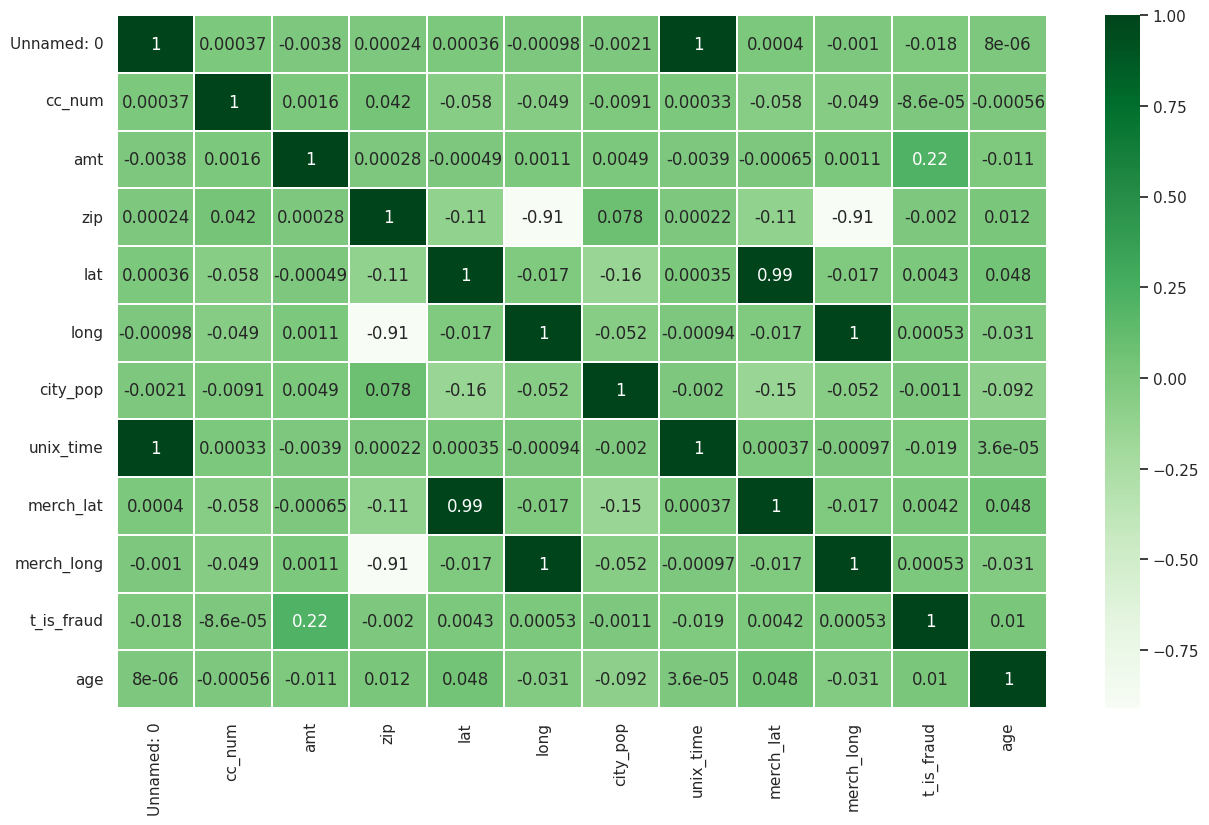

In [ ]:
sns.heatmap(c_card_data.corr(),annot=True, linewidths=0.005, cmap = "Greens")

# lets find year, month, hour, day of week, day from the transaction date time column and then dropping it

In [ ]:
c_card_data["t_date_time"] = pd.to_datetime(c_card_data["t_date_time"])
c_card_data["year"] = c_card_data["t_date_time"].dt.year.astype(int).astype(str)
c_card_data["hour"] = c_card_data["t_date_time"].dt.hour
c_card_data["month"] = c_card_data["t_date_time"].dt.month
c_card_data['dayofweek'] = c_card_data["t_date_time"].dt.dayofweek + 1
c_card_data["day"] = c_card_data["t_date_time"].dt.day
c_card_data = c_card_data.drop("t_date_time", axis=1)

In [ ]:
c_card_data.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,t_is_fraud,age,year,hour,month,dayofweek,day
0,0,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1.325376e+09,36.011293,-82.048315,0.0,31,2019,0,1,2,1
1,1,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1.325376e+09,49.159047,-118.186462,0.0,41,2019,0,1,2,1
2,2,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1.325376e+09,43.150704,-112.154481,0.0,57,2019,0,1,2,1
3,3,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1.325376e+09,47.034331,-112.561071,0.0,52,2019,0,1,2,1
4,4,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1.325376e+09,38.674999,-78.632459,0.0,33,2019,0,1,2,1


## Fraud transactions for year 2019

<Axes: xlabel='year', ylabel='count'>

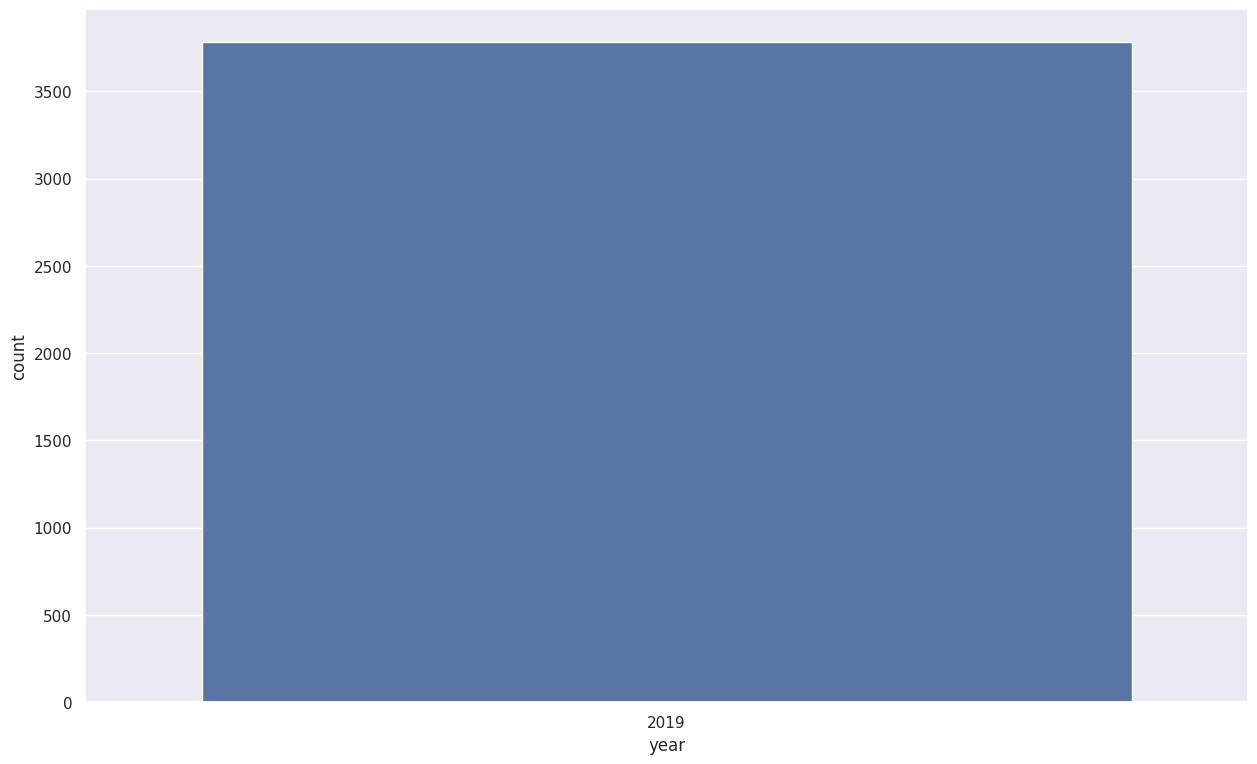

In [ ]:
sns.countplot(x="year",data=c_card_data[c_card_data["t_is_fraud"]==1])

## Percentage of fraud transactions

In [ ]:
count_0, count_1 = 0,0
for i in c_card_data["t_is_fraud"]:
    if i == 0:
        count_0+=1
    else:
        count_1+=1
print(count_1*100/count_0)

0.5913071749334525


In [ ]:
c_card_data.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       't_is_fraud', 'age', 'year', 'hour', 'month', 'dayofweek', 'day'],
      dtype='object')

In [ ]:
import numpy as np
def age_group(row):
    age = row["age"]
    age_groups = ["less than 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "60 to 70", "70 to 80", "80 to 90", "greater than 90"]
    bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, np.inf]
    return age_groups[np.digitize(age, bins) - 1]

c_card_data["age_group"] = c_card_data.apply(age_group, axis=1)

## Drop age and date of birth from dataset

In [ ]:
Processed_data = c_card_data.drop(['age','dob'],1)

<ipython-input-117-62faac285382>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
Processed_data.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,t_is_fraud,year,hour,month,dayofweek,day,age_group
0,0,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1.325376e+09,36.011293,-82.048315,0.0,2019,0,1,2,1,30 to 40
1,1,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1.325376e+09,49.159047,-118.186462,0.0,2019,0,1,2,1,40 to 50
2,2,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1.325376e+09,43.150704,-112.154481,0.0,2019,0,1,2,1,50 to 60
3,3,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1.325376e+09,47.034331,-112.561071,0.0,2019,0,1,2,1,50 to 60
4,4,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1.325376e+09,38.674999,-78.632459,0.0,2019,0,1,2,1,30 to 40


## Fraud transactions for different age groups

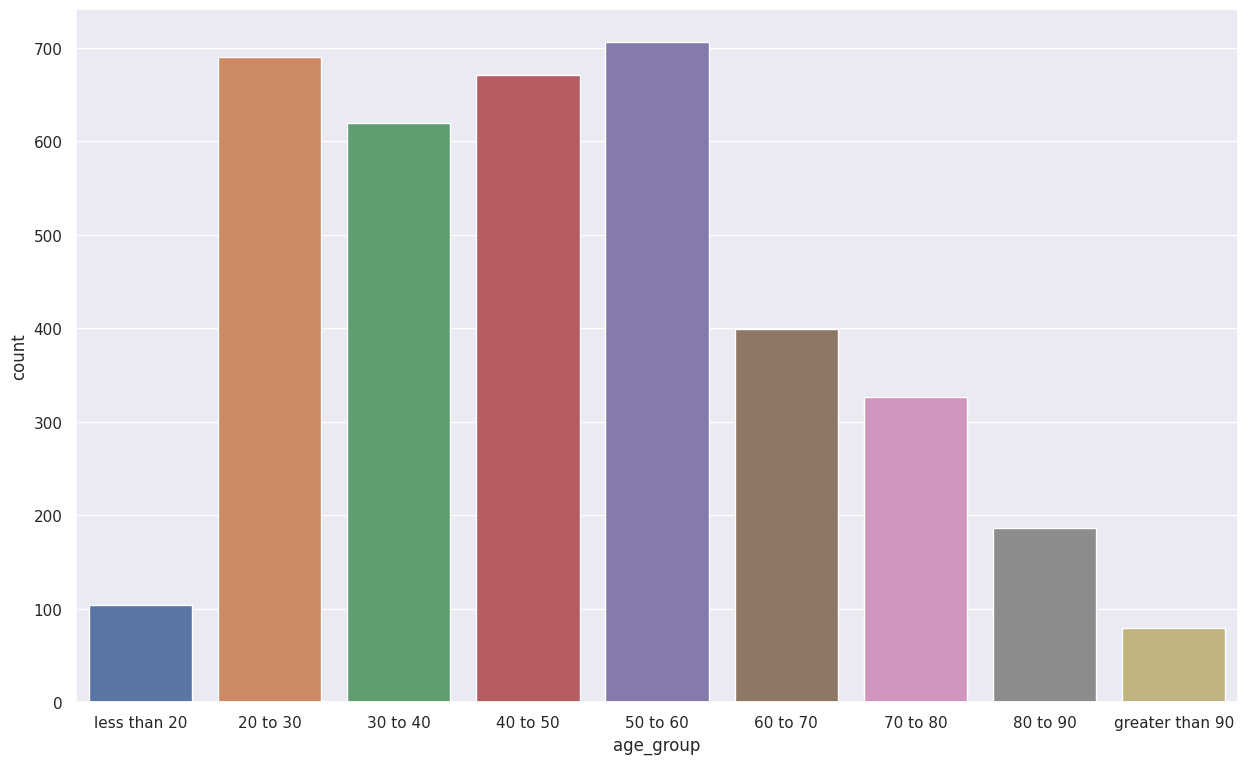

In [ ]:
# Define the order of age groups
order = ["less than 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "60 to 70", "70 to 80", "80 to 90", "greater than 90"]
fraud_data = Processed_data[Processed_data["t_is_fraud"] == 1]
sns.countplot(x="age_group", data=fraud_data, order=order) # Create a countplot for fraud transactions in different age groups
plt.show()

## Fraud transactions with respect to gender

<Axes: xlabel='gender', ylabel='count'>

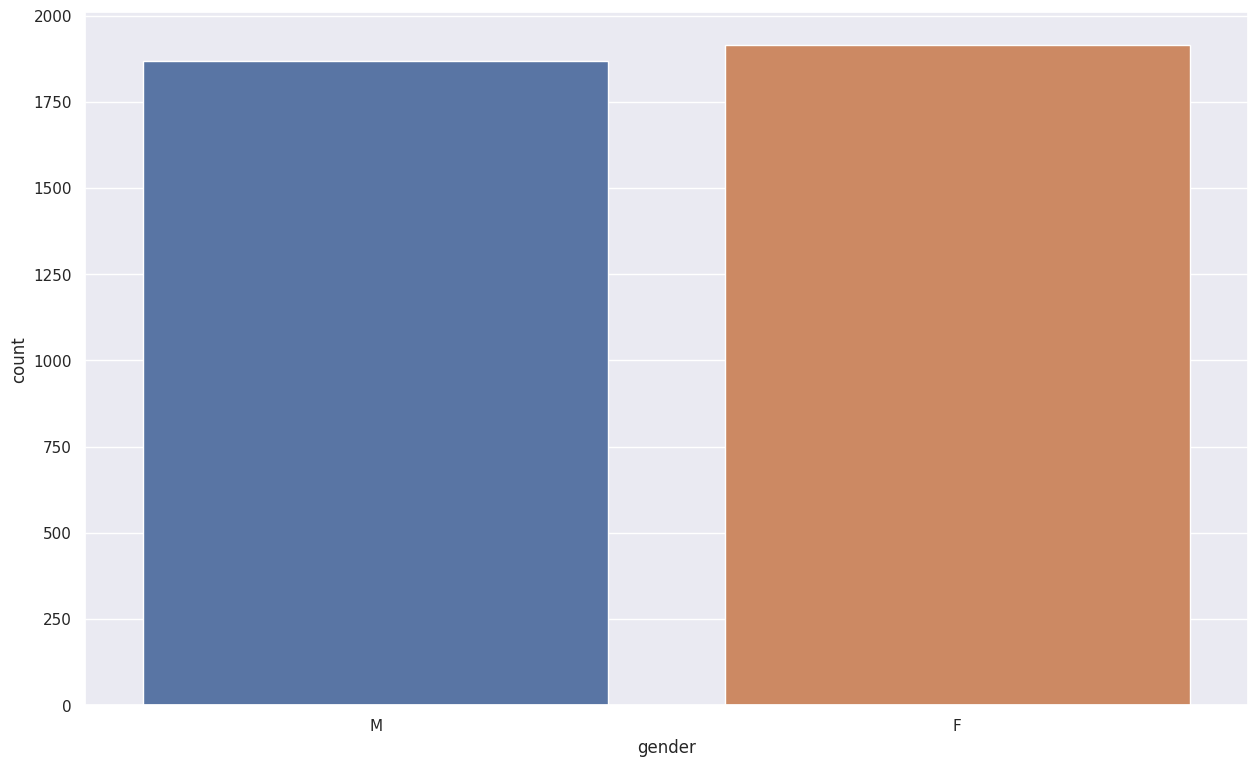

In [ ]:
sns.countplot(x="gender",data=Processed_data[Processed_data["t_is_fraud"]==1])

## Fraud transactions with respect to states

<Axes: xlabel='state', ylabel='count'>

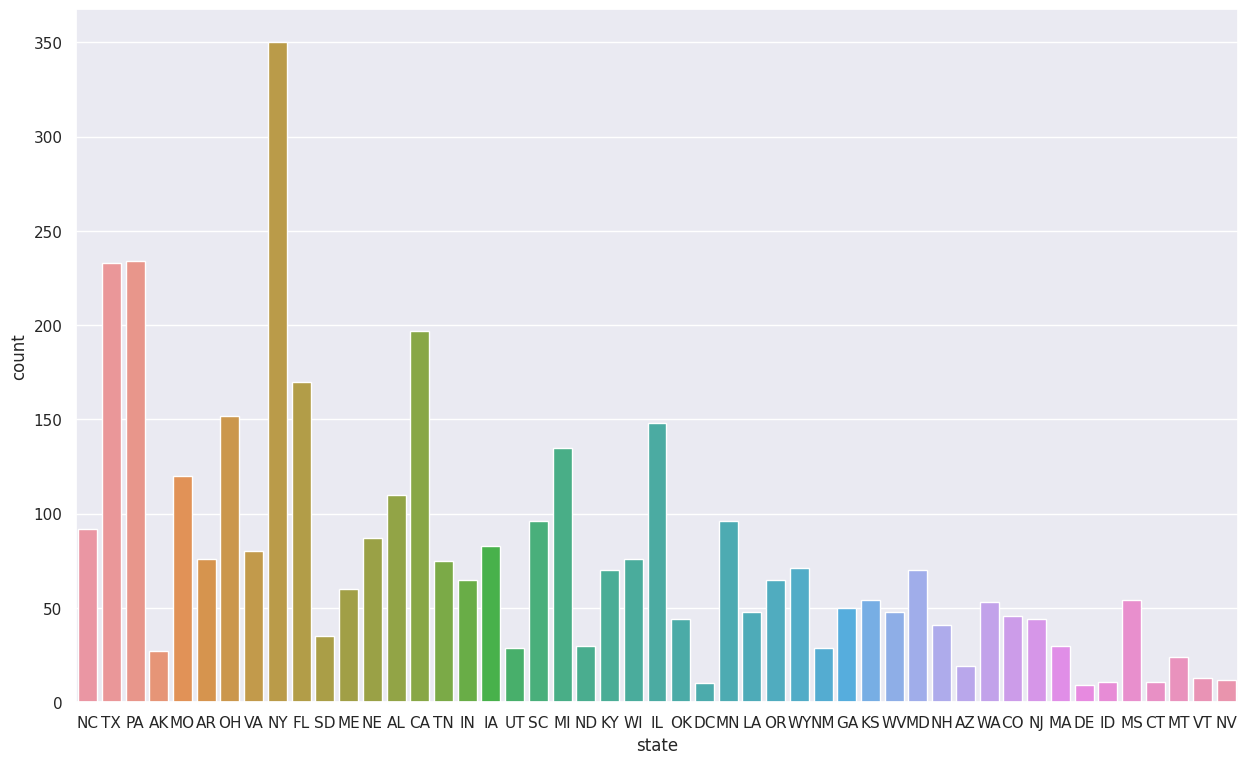

In [ ]:
sns.countplot(x="state",data=Processed_data[Processed_data["t_is_fraud"]==1])

## Fraud transactions with respect to the hour of day


<Axes: xlabel='hour', ylabel='count'>

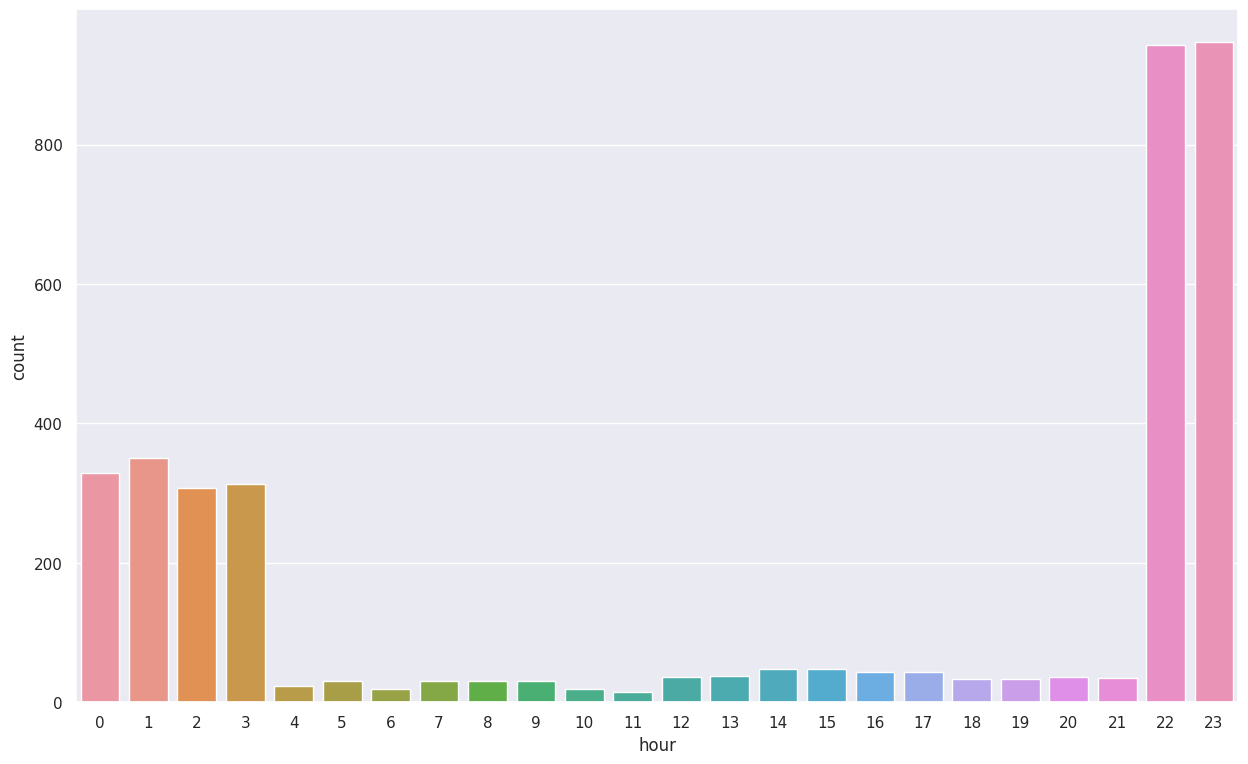

In [ ]:
sns.countplot(x="hour",data=Processed_data[Processed_data["t_is_fraud"]==1])

## Grouping and summarizing fraudulent transactions by state


In [ ]:
fraudulent_trans_by_state = Processed_data.groupby("state")["t_is_fraud"].sum().reset_index()
fraudulent_trans_by_state.rename(columns={"state": "State", "t_is_fraud": "Fraudulent Transactions"}, inplace=True)
fraudulent_trans_by_state.head()

,State,Fraudulent Transactions
0,AK,27.0
1,AL,110.0
2,AR,76.0
3,AZ,19.0
4,CA,197.0


## Intensity of fraud transactions that happened

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# Choropleth Map
fig = px.choropleth(fraudulent_trans_by_state,
                    locations='State',
                    color='Fraudulent Transactions',
                    locationmode='USA-states',
                    color_continuous_scale="picnic",
                    labels={'States': 'Fraudulent Transactions'},
                    scope='usa')

# Add State Labels
state_labels = go.Scattergeo(
    locations=fraudulent_trans_by_state['State'],
    locationmode='USA-states',
    text=fraudulent_trans_by_state['State'],
    mode='text'
)

fig.add_trace(state_labels)
fig.show()

## Distance between the merchant location and transaction location

In [ ]:
#imported numpy as np
# Calculate latitude and longitude differences
Processed_data["latitude_difference"] = np.abs(Processed_data["lat"] - Processed_data["merch_lat"])
Processed_data["longitude_difference"] = np.abs(Processed_data["long"] - Processed_data["merch_long"])
# Calculate the distance in kilometers
earth_radius_km = 6371  # Earth's radius in kilometers
Processed_data["dist"] = np.sqrt(Processed_data["latitude_difference"] ** 2 + Processed_data["longitude_difference"] ** 2) * earth_radius_km


## Generating CSV files

In [ ]:
Processed_data.to_csv("main.csv", index=False)
fraudulent_trans_by_state.to_csv("states.csv", index=False)

In [ ]:
#Dropping the columns which are required for any calculation
Processed_data = Processed_data.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"],1)

<ipython-input-127-bdf61a60fe84>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## Get the unique values

In [ ]:
Processed_data.nunique()

Unnamed: 0    643552
cc_num           926
merchant         693
category          14
amt            40263
first            345
last             474
gender             2
street           946
city             866
state             51
zip              934
city_pop         852
job              486
trans_num     643552
unix_time     633386
t_is_fraud         2
year               1
hour              24
month              9
dayofweek          7
day               31
age_group          9
dist          643551
dtype: int64

In [ ]:
#Dropping some more columns which dont contribute to the result
drop_cols = ["cc_num","merchant","first","last","street","trans_num","Unnamed: 0","city_pop","job","unix_time","trans_num","city","zip"]
Processed_data = Processed_data.drop(columns = drop_cols,axis=1)

In [ ]:
Processed_data.head()
Processed_data.size

7722624

One Hot encoding

In [ ]:
#One hot encoding of data
Processed_data_d = pd.concat([Processed_data,pd.get_dummies(Processed_data["gender"]),pd.get_dummies(Processed_data["year"]),pd.get_dummies(Processed_data["age_group"]),pd.get_dummies(Processed_data["state"]),pd.get_dummies("category")],axis=1)
Processed_data_d = Processed_data_d.drop(["gender","age_group","state","year","category"],1)

<ipython-input-131-a94084564e6f>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



# Encoded data

In [ ]:
Processed_data_d.head()

,amt,t_is_fraud,hour,month,dayofweek,day,dist,F,M,2019,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,0.0,0,1,2,1,5560.796763,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0.0,0,1,2,1,1734.887295,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0.0,0,1,2,1,6217.110586,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0.0,0,1,2,1,5860.055593,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0.0,0,1,2,1,5533.242791,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.utils import resample
# Resampling the dataframe
not_fraud = Processed_data_d[Processed_data_d.t_is_fraud == 0]
fraud = Processed_data_d[Processed_data_d.t_is_fraud == 1]
oversample = resample(fraud, replace=True, n_samples=len(not_fraud), random_state=15)
balanced_Processed_data_d = pd.concat([not_fraud, oversample])

### lets check the count of fraud transactions

In [ ]:
count_0, count_1 = 0,0
for i in balanced_Processed_data_d["t_is_fraud"]:
    if i == 0:
        count_0+=1
    else:
        count_1+=1
print(count_1,count_0)

639769 639769


In [ ]:
#Using test train split to split data into coordinates
X_train,X_test,y_train,y_test = train_test_split(balanced_Processed_data_d.drop(["t_is_fraud"],axis=1),balanced_Processed_data_d["t_is_fraud"],test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1023630, 69), (255908, 69), (1023630,), (255908,))

In [ ]:
# Resampling the dataframe
# Defining a generic function to implement models and return data values
def model_implementation(model, X_train, X_test, y_train, y_test):
    if model == "LogisticRegression":
        model = "Logistic Regression"
        model_impl = LogisticRegression()
    elif model == "DecisionTree":
        model = "Decision Tree"
        model_impl = DecisionTreeClassifier(random_state=0, max_depth=2)
    elif model == "RandomForestClassifier":
        model = "Random Forest Classifier"
        model_impl = RandomForestClassifier(random_state=0, max_depth=10, max_features=5, min_samples_leaf=30, min_samples_split=100, n_estimators=500)
    elif model == "GaussianNaiveBias":
        model = "Gaussian Naive Bias"
        model_impl = GaussianNB()
    model_impl.fit(X_train, y_train)
    pred_train = model_impl.predict(X_train)
    pred_test = model_impl.predict(X_test)

    accuracy_train = accuracy_score(pred_train, y_train)
    accuracy_test = accuracy_score(pred_test, y_test)
    confusionMatrix = confusion_matrix(y_test, pred_test)
    classificationReport = classification_report(y_test, pred_test)
    mae = mean_absolute_error(y_train, pred_train)
    print("Model Implemented: ", model)
    print("Accuracy on Training Set: ", accuracy_train)
    print('Accuracy on Validation Set: ', accuracy_test)
    print('Mean absolute error: ', mae)
    print('Confusion Matrix\n', confusionMatrix)
    print('Classification Report\n', classificationReport)

    return [accuracy_train, accuracy_test]


In [ ]:
LRmodel= model_implementation("LogisticRegression",X_train,X_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model Implemented:  Logistic Regression
Accuracy on Training Set:  0.8370817580571105
Accuracy on Validation Set:  0.8367850946433875
Mean absolute error:  0.1629182419428895
Confusion Matrix
 [[120426   7363]
 [ 34405  93714]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.78      0.94      0.85    127789
         1.0       0.93      0.73      0.82    128119

    accuracy                           0.84    255908
   macro avg       0.85      0.84      0.83    255908
weighted avg       0.85      0.84      0.83    255908



In [ ]:
NBmodel= model_implementation("GaussianNaiveBias",X_train,X_test,y_train,y_test)

Model Implemented:  Gaussian Naive Bias
Accuracy on Training Set:  0.7082940124849799
Accuracy on Validation Set:  0.7088992919330385
Mean absolute error:  0.2917059875150201
Confusion Matrix
 [[ 80301  47488]
 [ 27007 101112]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.75      0.63      0.68    127789
         1.0       0.68      0.79      0.73    128119

    accuracy                           0.71    255908
   macro avg       0.71      0.71      0.71    255908
weighted avg       0.71      0.71      0.71    255908



In [ ]:
RFmodel = model_implementation("RandomForestClassifier",X_train,X_test,y_train,y_test)

Model Implemented:  Random Forest Classifier
Accuracy on Training Set:  0.905002784209138
Accuracy on Validation Set:  0.9046571424105538
Mean absolute error:  0.09499721579086193
Confusion Matrix
 [[122385   5404]
 [ 18995 109124]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91    127789
         1.0       0.95      0.85      0.90    128119

    accuracy                           0.90    255908
   macro avg       0.91      0.90      0.90    255908
weighted avg       0.91      0.90      0.90    255908



In [ ]:
DTmodel= model_implementation("DecisionTree",X_train, X_test,y_train,y_test)

Model Implemented:  Decision Tree
Accuracy on Training Set:  0.8555806297197229
Accuracy on Validation Set:  0.8552604842365225
Mean absolute error:  0.14441937028027704
Confusion Matrix
 [[124423   3366]
 [ 33674  94445]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.79      0.97      0.87    127789
         1.0       0.97      0.74      0.84    128119

    accuracy                           0.86    255908
   macro avg       0.88      0.86      0.85    255908
weighted avg       0.88      0.86      0.85    255908



<Axes: >

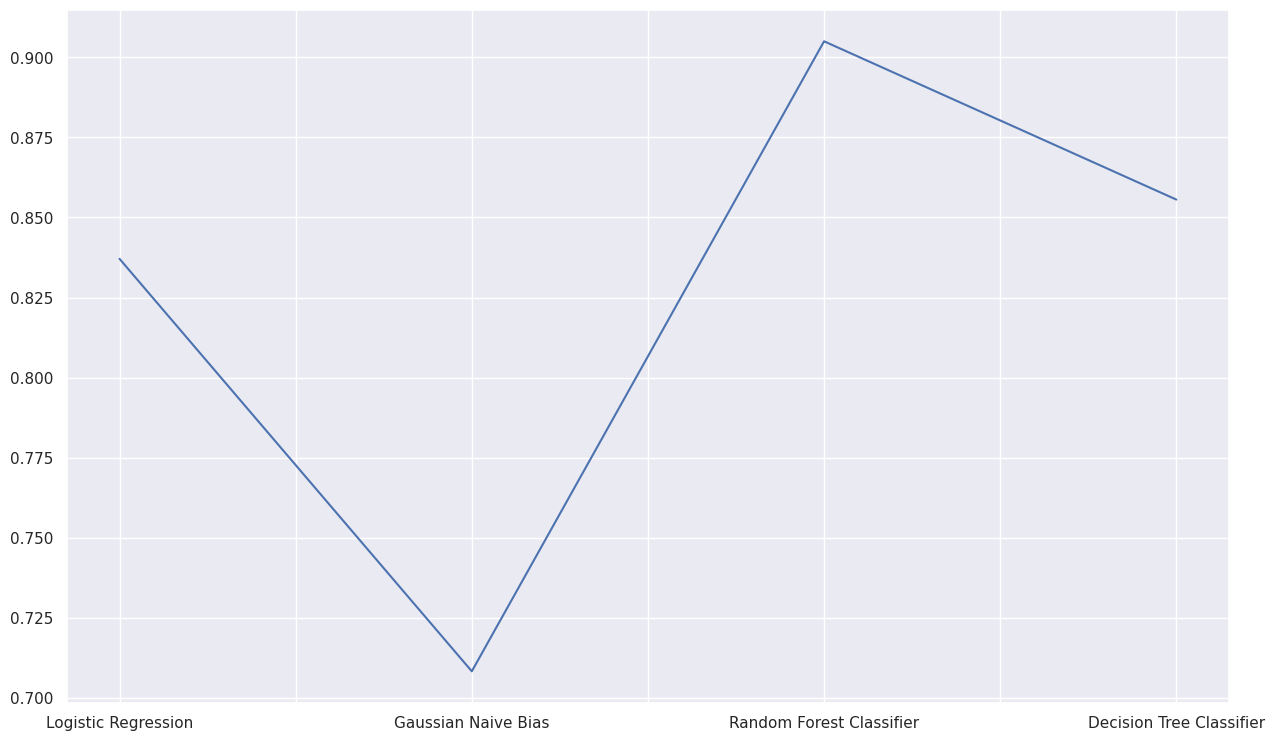

In [ ]:
train_val = [LRmodel[0],NBmodel[0],RFmodel[0],DTmodel[0]]
index = ["Logistic Regression","Gaussian Naive Bias","Random Forest Classifier","Decision Tree Classifier"]
training_acc = pd.Series(data=train_val,index=index)
training_acc.plot.line(x="Model Implementation",y="Accuracy in percentages")